# ======================================================
# Exploratory Data Analysis (EDA)
# Mobile Game In-App Purchases & Player Behavior
# ======================================================

# Langkah 1: Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Langkah 2: Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Langkah 3: Baca Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mobile_game_inapp_purchases_clean.csv")
df.head()

,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate,IsPayer,AvgSpendPerDay,HighValueUser,Recency
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49.0,Male,Norway,Android,battle royale,9,12.83,Minnow,11.40,28.0,Apple Pay,2025-03-19,1,0.407143,No,207.0
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15.0,Male,Switzerland,Ios,action rpg,11,19.39,Minnow,6.37,18.0,Debit Card,2025-06-08,1,0.353889,No,126.0
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23.0,Male,China,Android,fighting,9,8.87,Minnow,15.81,30.0,Apple Pay,2025-06-02,1,0.527000,No,132.0
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31.0,Male,Mexico,Android,racing,12,19.56,Minnow,13.49,9.0,Debit Card,2025-04-01,1,1.498889,No,194.0
4,aa7eec14-4846-47b9-b879-9c98038cda04,37.0,Female,India,Android,battle royale,10,15.23,Minnow,10.86,15.0,Paypal,2025-05-05,1,0.724000,No,160.0


# --- Info dasar dataset

In [ ]:
df.info()
print(df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UserID                         3024 non-null   object 
 1   Age                            3024 non-null   float64
 2   Gender                         3024 non-null   object 
 3   Country                        3024 non-null   object 
 4   Device                         3024 non-null   object 
 5   GameGenre                      3024 non-null   object 
 6   SessionCount                   3024 non-null   int64  
 7   AverageSessionLength           3024 non-null   float64
 8   SpendingSegment                3024 non-null   object 
 9   InAppPurchaseAmount            3024 non-null   float64
 10  FirstPurchaseDaysAfterInstall  3024 non-null   float64
 11  PaymentMethod                  2888 non-null   object 
 12  LastPurchaseDate               2888 non-null   o

,Age,SessionCount,AverageSessionLength,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,IsPayer,AvgSpendPerDay,Recency
count,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.00000
mean,33.523148,10.074735,20.073978,97.969349,14.647156,0.954696,10.632609,162.60582
std,11.872885,3.115863,8.585208,444.510953,9.379077,0.208005,75.188751,72.52781
min,13.000000,1.000000,5.010000,0.000000,-1.000000,0.000000,0.000000,-1.00000
25%,24.000000,8.000000,12.680000,5.120000,6.000000,1.000000,0.283182,106.00000
50%,33.000000,10.000000,20.315000,11.455000,15.000000,1.000000,0.694407,164.00000
75%,44.000000,12.000000,27.420000,17.552500,23.000000,1.000000,2.082708,223.00000
max,54.000000,22.000000,34.990000,4964.450000,30.000000,1.000000,2385.385000,284.00000


# Langkah 4: Eksplorasi Data Dasar

Cek kategori unik

In [ ]:
print("\nKolom Kategorikal:")
for col in ['Gender', 'Country', 'Device', 'GameGenre', 'SpendingSegment', 'PaymentMethod', 'HighValueUser']:
    print(f"{col}: {df[col].nunique()} nilai unik")


Kolom Kategorikal:
Gender: 3 nilai unik
Country: 28 nilai unik
Device: 3 nilai unik
GameGenre: 16 nilai unik
SpendingSegment: 3 nilai unik
PaymentMethod: 7 nilai unik
HighValueUser: 2 nilai unik


Distribusi Gender

/tmp/ipython-input-2550523364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


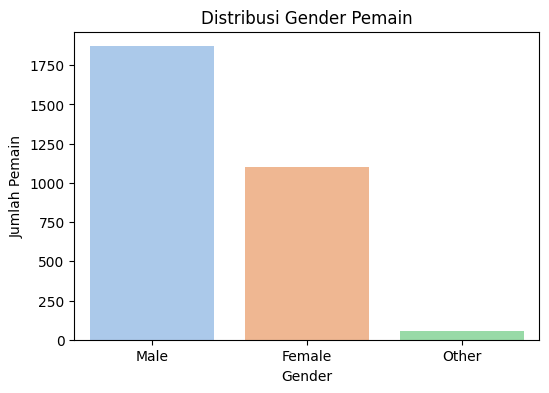

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Distribusi Gender Pemain')
plt.xlabel('Gender')
plt.ylabel('Jumlah Pemain')
plt.show()

Distribusi Spending Segment

/tmp/ipython-input-2461562839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='SpendingSegment', palette='coolwarm', order=df['SpendingSegment'].value_counts().index)


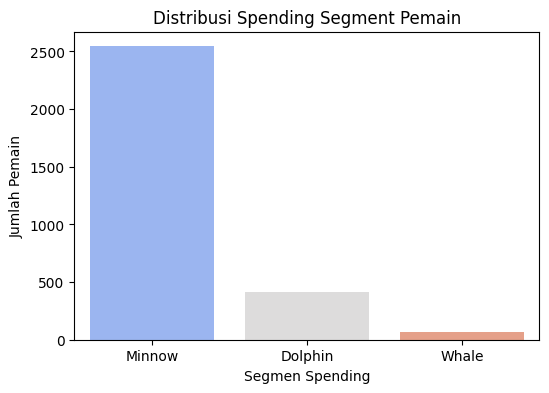

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='SpendingSegment', palette='coolwarm', order=df['SpendingSegment'].value_counts().index)
plt.title('Distribusi Spending Segment Pemain')
plt.xlabel('Segmen Spending')
plt.ylabel('Jumlah Pemain')
plt.show()

# Langkah 5: Analisis Perilaku Bermain

/tmp/ipython-input-2766674178.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='GameGenre', y='AverageSessionLength', palette='viridis', estimator=np.mean)


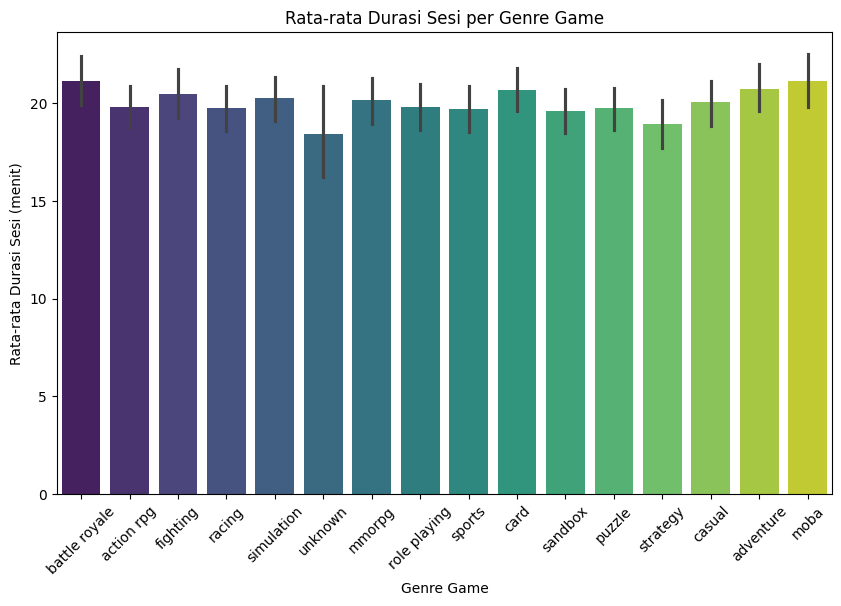

In [ ]:
# Rata-rata durasi sesi berdasarkan genre
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='GameGenre', y='AverageSessionLength', palette='viridis', estimator=np.mean)
plt.title('Rata-rata Durasi Sesi per Genre Game')
plt.xlabel('Genre Game')
plt.ylabel('Rata-rata Durasi Sesi (menit)')
plt.xticks(rotation=45)
plt.show()

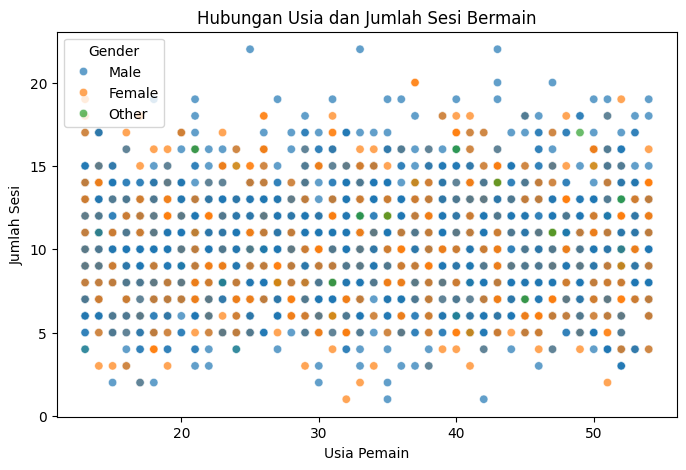

In [ ]:
# Hubungan jumlah sesi dan umur pemain
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='SessionCount', hue='Gender', alpha=0.7)
plt.title('Hubungan Usia dan Jumlah Sesi Bermain')
plt.xlabel('Usia Pemain')
plt.ylabel('Jumlah Sesi')
plt.legend(title='Gender')
plt.show()

# Langkah 6: Analisis Pola Pembelian

/tmp/ipython-input-736517882.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='SpendingSegment', y='InAppPurchaseAmount', estimator=np.mean, palette='coolwarm')


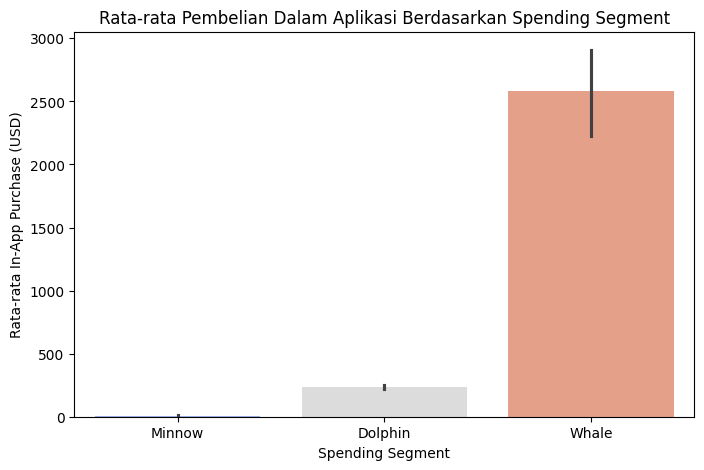

In [ ]:
# Rata-rata in-app purchase berdasarkan SpendingSegment
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='SpendingSegment', y='InAppPurchaseAmount', estimator=np.mean, palette='coolwarm')
plt.title('Rata-rata Pembelian Dalam Aplikasi Berdasarkan Spending Segment')
plt.xlabel('Spending Segment')
plt.ylabel('Rata-rata In-App Purchase (USD)')
plt.show()

/tmp/ipython-input-2874182241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Device', y='InAppPurchaseAmount', estimator=np.mean, palette='magma')


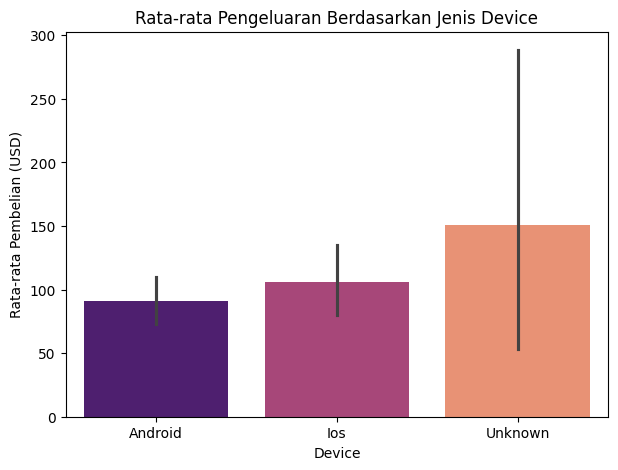

In [ ]:
# Rata-rata spending per Device
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Device', y='InAppPurchaseAmount', estimator=np.mean, palette='magma')
plt.title('Rata-rata Pengeluaran Berdasarkan Jenis Device')
plt.xlabel('Device')
plt.ylabel('Rata-rata Pembelian (USD)')
plt.show()

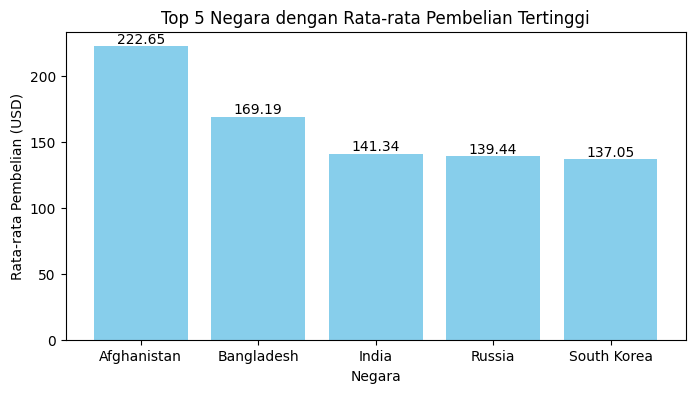

In [ ]:
# Rata-rata pembelian per Negara (Top 5)
top_countries = df.groupby('Country')['InAppPurchaseAmount'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,4))
bars = plt.bar(top_countries.index, top_countries.values, color='skyblue')
plt.title('Top 5 Negara dengan Rata-rata Pembelian Tertinggi')
plt.xlabel('Negara')
plt.ylabel('Rata-rata Pembelian (USD)')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), va='bottom', ha='center')
plt.show()

# Langkah 7: Analisis Korelasi

In [ ]:
# Pilih hanya kolom numerik
num_df = df.select_dtypes(include=[np.number])

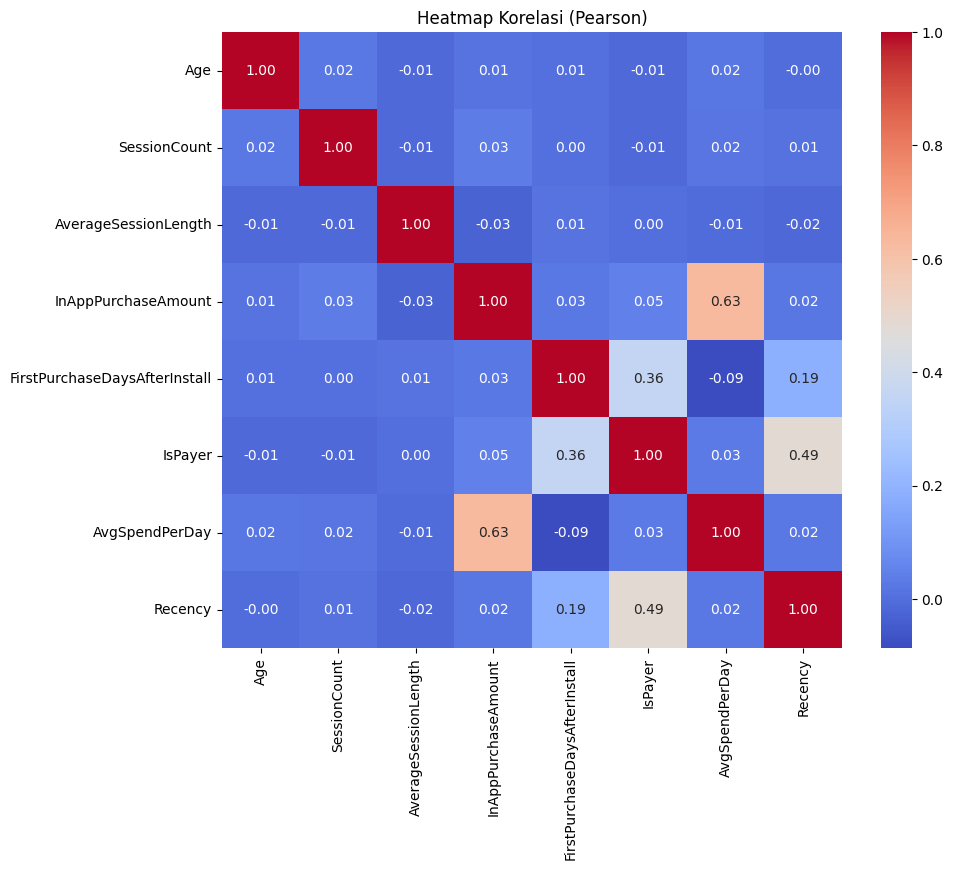

In [ ]:
# Heatmap Korelasi Pearson
plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap Korelasi (Pearson)')
plt.show()

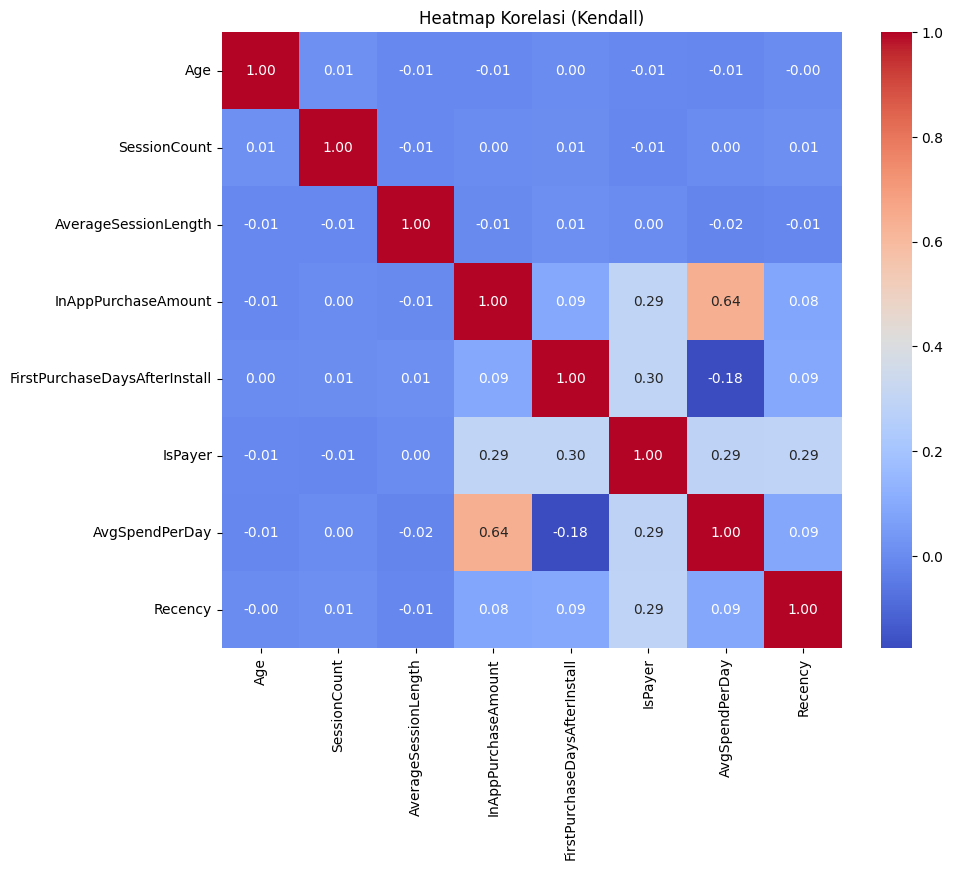

In [ ]:
# Heatmap Korelasi Kendall
kendall_corr = num_df.corr(method='kendall')
plt.figure(figsize=(10,8))
sns.heatmap(kendall_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap Korelasi (Kendall)')
plt.show()

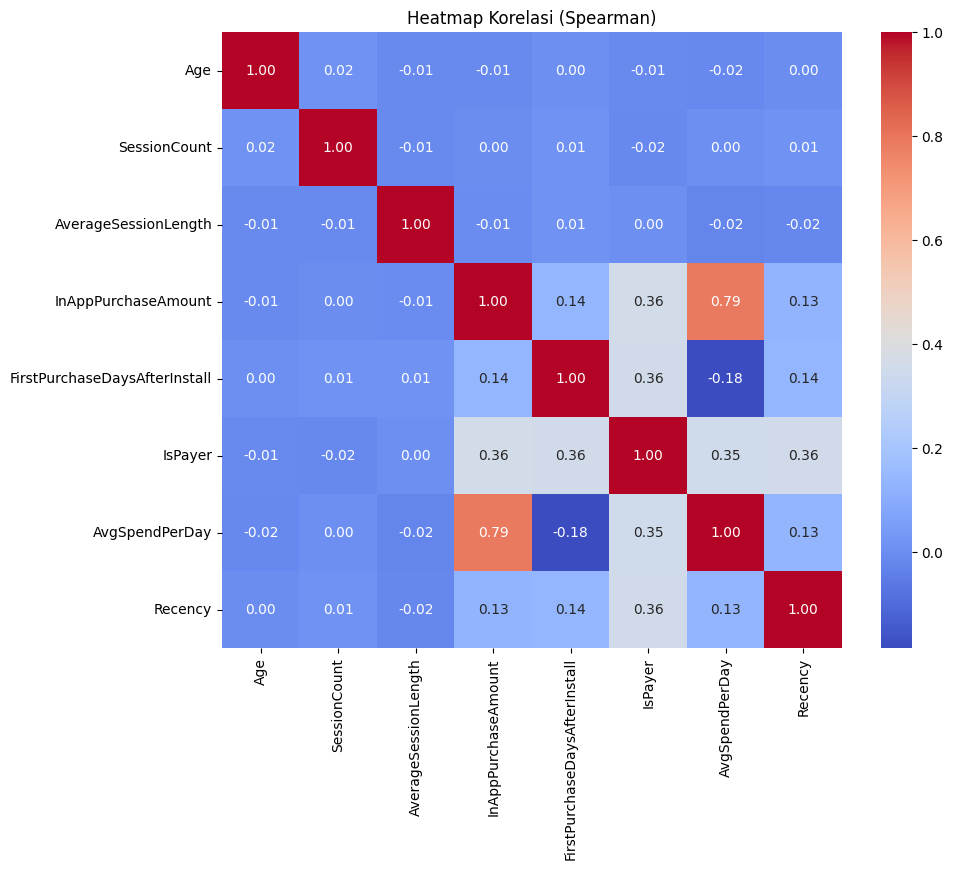

In [ ]:
# Heatmap Korelasi Spearman
spearman_corr = num_df.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap Korelasi (Spearman)')
plt.show()

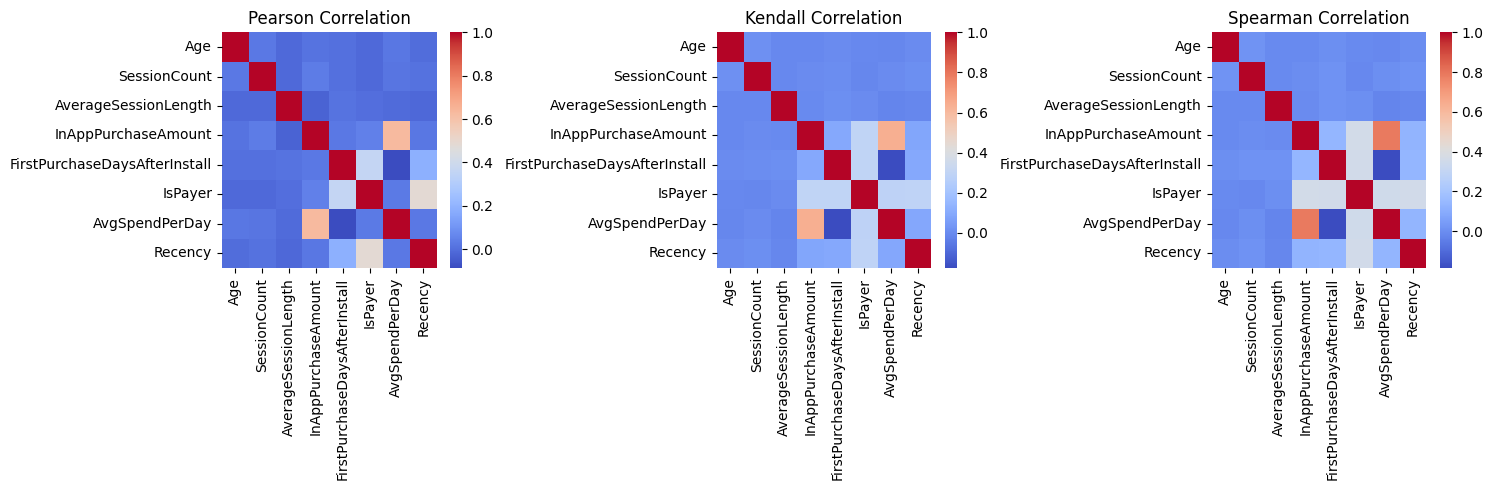

In [ ]:
# Bandingkan ketiganya
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.heatmap(num_df.corr(method='pearson'), cmap='coolwarm')
plt.title('Pearson Correlation')

plt.subplot(1,3,2)
sns.heatmap(num_df.corr(method='kendall'), cmap='coolwarm')
plt.title('Kendall Correlation')

plt.subplot(1,3,3)
sns.heatmap(num_df.corr(method='spearman'), cmap='coolwarm')
plt.title('Spearman Correlation')

plt.tight_layout()
plt.show()

# Langkah 7: Insight Awal

In [ ]:
print("🔍 Beberapa Temuan Awal:")
print(f"- Total pemain unik: {df['UserID'].nunique()}")
print(f"- Rata-rata pembelian dalam aplikasi: ${df['InAppPurchaseAmount'].mean():.2f}")
print(f"- Rata-rata jumlah sesi: {df['SessionCount'].mean():.2f}")
print(f"- Segmen dengan pembelian tertinggi: {df.groupby('SpendingSegment')['InAppPurchaseAmount'].mean().idxmax()}")
print(f"- Genre dengan durasi sesi terpanjang: {df.groupby('GameGenre')['AverageSessionLength'].mean().idxmax()}")

🔍 Beberapa Temuan Awal:
- Total pemain unik: 3024
- Rata-rata pembelian dalam aplikasi: $97.97
- Rata-rata jumlah sesi: 10.07
- Segmen dengan pembelian tertinggi: Whale
- Genre dengan durasi sesi terpanjang: battle royale
